<a href="https://colab.research.google.com/github/Tejashwinicb2004/machinelearning/blob/main/Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [7]:
 import pandas as pd
df = pd.read_csv('testdata.csv')
df.head()


,Sl. No,Temperature,Preasure
0,1,2,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [8]:
temperature = df.iloc[:, 1:2].values #Input
preasure = df.iloc[:, 2].values #output

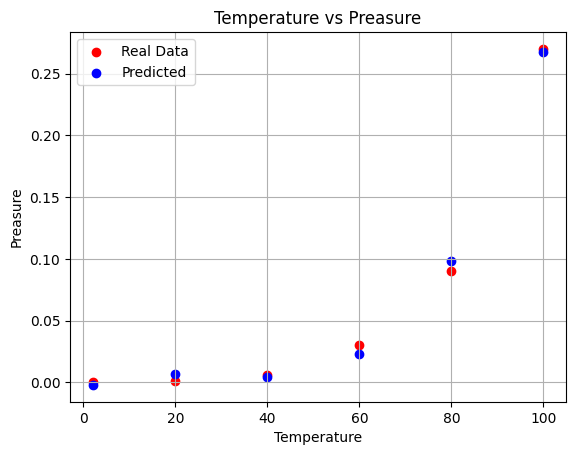

In [9]:
polyreg = PolynomialFeatures(degree=3)
X_poly = polyreg.fit_transform(temperature) #Transforming the input data into polynomial features
linreg = LinearRegression()
linreg.fit(X_poly, preasure) #Fitting the model with the transformed data
#Predicting the output with the transformed input data
predicted_preasure = linreg.predict(X_poly)

#Visualising the results
plt.scatter(temperature, preasure, color='red')
plt.scatter(temperature, predicted_preasure, color='blue')
plt.title('Temperature vs Preasure')
plt.xlabel('Temperature')
plt.ylabel('Preasure')
plt.legend(['Real Data', 'Predicted'])
plt.grid()
plt.show()

<ipython-input-10-b12a24216ff4>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(temperature), max(temperature), 0.1).reshape(-1, 1)


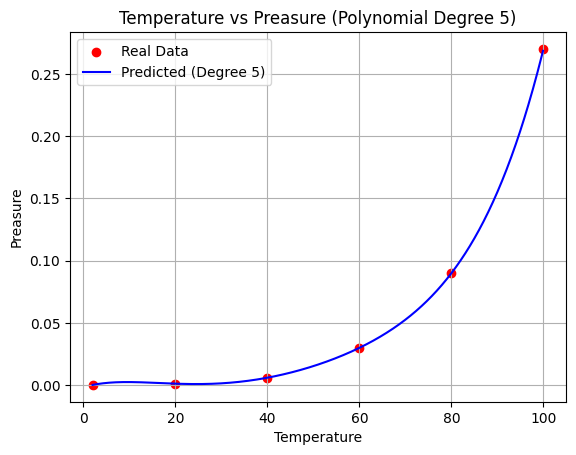

In [10]:
# prompt: Run the code by changing the value of degree variable and observe the plot and write the observation give the code with no errors

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Ensure the file 'testdata.csv' exists in your Colab environment
# You might need to upload it or fetch it from a source.

# Load the data
df = pd.read_csv('testdata.csv')

# Extract features and target variable
temperature = df.iloc[:, 1:2].values  # Input
preasure = df.iloc[:, 2].values  # Output

# Define the degree of the polynomial
degree = 5 # You can change this value to observe different results

# Create polynomial features
polyreg = PolynomialFeatures(degree=degree)
X_poly = polyreg.fit_transform(temperature)  # Transforming the input data into polynomial features

# Create and train the linear regression model
linreg = LinearRegression()
linreg.fit(X_poly, preasure)  # Fitting the model with the transformed data

# Predict the output with the transformed input data
predicted_preasure = linreg.predict(X_poly)

# Visualising the results
plt.scatter(temperature, preasure, color='red')
# Use linspace to create a smooth curve for the prediction
X_grid = np.arange(min(temperature), max(temperature), 0.1).reshape(-1, 1)
plt.plot(X_grid, linreg.predict(polyreg.fit_transform(X_grid)), color='blue')

plt.title(f'Temperature vs Preasure (Polynomial Degree {degree})')
plt.xlabel('Temperature')
plt.ylabel('Preasure')
plt.legend(['Real Data', f'Predicted (Degree {degree})'])
plt.grid()
plt.show()

# Observation:
# As you increase the degree of the polynomial, the model becomes more complex
# and can potentially fit the training data more closely.
# A low degree (e.g., 1 or 2) might result in a simpler curve that may not capture
# the nuances of the data.
# A high degree can lead to overfitting, where the model fits the training data
# very well but performs poorly on unseen data.
# Observe how the blue line (predicted) changes its curvature as you vary the 'degree' variable.
# For this specific dataset, you can see how different degrees try to fit the shape
# of the red data points. Choosing the optimal degree often involves techniques like
# cross-validation to balance bias and variance.


--2025-05-16 06:15:56--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auto-mpg.data’

auto-mpg.data           [ <=>                ]  29.58K  --.-KB/s    in 0.05s   

2025-05-16 06:15:57 (603 KB/s) - ‘auto-mpg.data’ saved [30286]



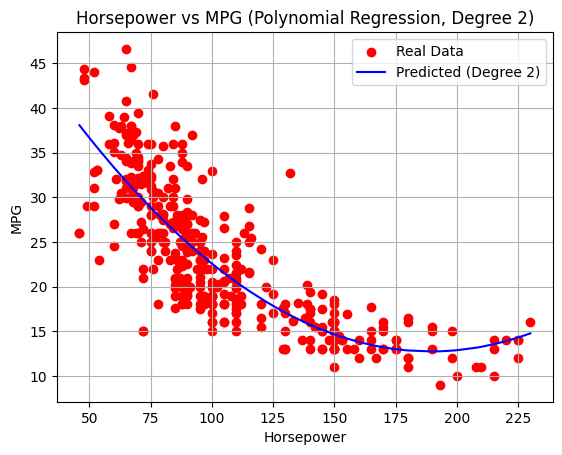

In [11]:
# prompt: Implement on Auto MPG Dataset give the solution

# Download the Auto MPG dataset
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data" -O auto-mpg.data

# Read the dataset
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv('auto-mpg.data', names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna() # Drop rows with missing values

# We'll predict MPG based on other features
# For simplicity, let's start with a single feature, say 'Horsepower'
# You can extend this to include multiple features later.

# Extract features (X) and target (y)
X = dataset[['Horsepower']].values  # Input feature
y = dataset['MPG'].values            # Target variable

# Define the degree of the polynomial
degree = 2  # You can change this value

# Create polynomial features
polyreg = PolynomialFeatures(degree=degree)
X_poly = polyreg.fit_transform(X)

# Create and train the linear regression model
linreg = LinearRegression()
linreg.fit(X_poly, y)

# Predict the output with the transformed input data
predicted_mpg = linreg.predict(X_poly)

# Visualising the results
plt.scatter(X, y, color='red', label='Real Data')

# Use linspace to create a smooth curve for the prediction
# Sort the data for plotting a smooth curve
sorted_zip = sorted(zip(X.flatten(), predicted_mpg))
X_sorted, predicted_mpg_sorted = zip(*sorted_zip)

plt.plot(X_sorted, predicted_mpg_sorted, color='blue', label=f'Predicted (Degree {degree})')

plt.title(f'Horsepower vs MPG (Polynomial Regression, Degree {degree})')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show()

# To evaluate the model further, you could split the data into training and testing sets
# and calculate metrics like Mean Squared Error.
